In [42]:
import pandas as pd
import seaborn as sb
import wordcloud as wc
import matplotlib.pyplot as plt

In [32]:
!pip install seaborn

In [35]:
!pip install wordcloud

In [7]:
df = pd.read_csv("SMSSpamCollection", sep = "\t", names = ["label", "text"])

In [10]:
dataset = df.to_dict("records")

In [8]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
index = int(len(dataset)*0.8)

In [16]:
train = dataset[:index]

In [17]:
test = dataset[index:]

In [2]:
spam_words = {}
ham_words = {}
spam_text = ""
ham_text = ""
for item in train:
    label = item["label"]
    text = item["text"]
    text = text.replace(".","").replace(",","").replace(":","").replace("!","").replace("'","").replace('"',"")\
        .replace(";","").replace("?","").replace("-","")
    text = text.lower()
    if label == "spam":
        spam_text += "\n" + text 
    else:
        ham_text += "\n" + text
    words = text.split(" ")
    for word in words:
        if label == "spam":
            if word in spam_words:
                spam_words[word] += 1
            else:
                spam_words[word] = 1
        else:
            if word in ham_words:
                ham_words[word] += 1
            else:    
                ham_words[word] = 1
    print (words)
    break
    

NameError: name 'train' is not defined

In [47]:
spam_wc = wc.WordCloud()
spam_wc.generate(spam_text)

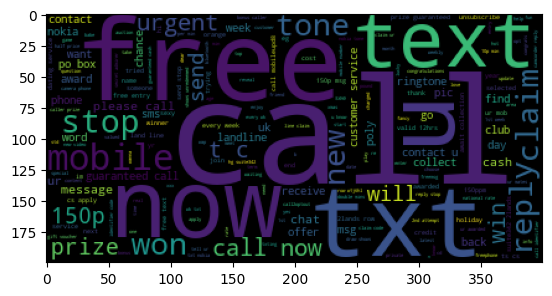

In [48]:
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.WordCloud()
ham_wc.generate(ham_text)

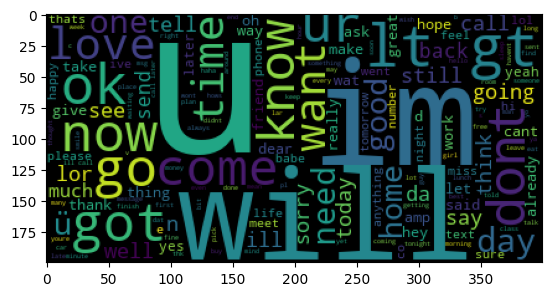

In [51]:
plt.imshow(ham_wc)